# Davis Franklin

## Research Questions

**I would like to investigate Apple's market capitalization by examining the effect of each new iPhone release on its stock value. Specifically, I aim to analyze whether the market responds positively or negatively to each iPhone release, and to what extent the stock value is impacted. Through this analysis, I hope to determine the overall impact of iPhones on Apple's stock value, and identify the iPhone releases that had the largest positive and negative impacts. Ultimately, the goal is to understand how much iPhones impact Apple's stock value.**

---

## Action Plan
I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer these research question by using an additional dataset that includes the release dates of all the iPhones. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times.

## Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import calendar
import datetime

import sys
sys.path.append('/Users/davisfranklin/Desktop/UBCO/DATA301/project-group-group11/analysis/code')
from functions_analysis1 import process

sns.set_theme(style="ticks", font_scale=1)
plt.rc("axes.spines", top=False, right=False)
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

### Loading Data:

In [2]:
stocks_df = pd.read_csv("../data/raw/AAPL_stock.csv")
iPhone_df = pd.read_csv("../data/raw/iPhones.csv")

---
### Data Understanding: 
In this step I inspect the two datasets to further understand, and discover what parts need to cleaned or processed. 

### For stocks_df:

In [3]:
stocks_df.shape

(10443, 7)

In [4]:
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
stocks_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [7]:
stocks_df.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For iPhone_df:

In [8]:
iPhone_df.shape

(37, 2)

In [9]:
iPhone_df.head()

,iPhone,Release_Date
0,iPhone 1st Gen,2007-01-09
1,iPhone 3G,2008-05-09
2,iPhone 3Gs,2009-05-08
3,iPhone 4,2010-05-07
4,iPhone 4S,2011-10-04


In [10]:
iPhone_df.dtypes

iPhone          object
Release_Date    object
dtype: object

In [11]:
iPhone_df.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,2022-09-07
freq,1,4


In [12]:
first_iPhone = iPhone_df['Release_Date'].min()
print(f"The first iPhone was released n: {first_iPhone}")

newest_iPhone = iPhone_df['Release_Date'].max()
print(f"The newest iPhone was released on: {newest_iPhone}")

The first iPhone was released n: 2007-01-09
The newest iPhone was released on: 2022-09-07


---
## Data Processing/Wrangling/Cleaning:

I use the process function to: 
* Merge the stock and iphone datasets to create one dataset with all the required data.
* Remove unneeded columns: High, Low, Open, Close, and Volume.
* Add the change column: change = Close - Open.
* Remove unneeded rows: rows before 2000-01-01.
* Converted the dates to datetime objects.
* Renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces)

In [13]:
df = process("../data/raw/AAPL_stock.csv", "../data/raw/iPhones.csv")

* saving the final dataframe as a csv file

In [14]:
df.to_csv('../data/processed/analysis1_final.csv')

---
## Data Visualizations:

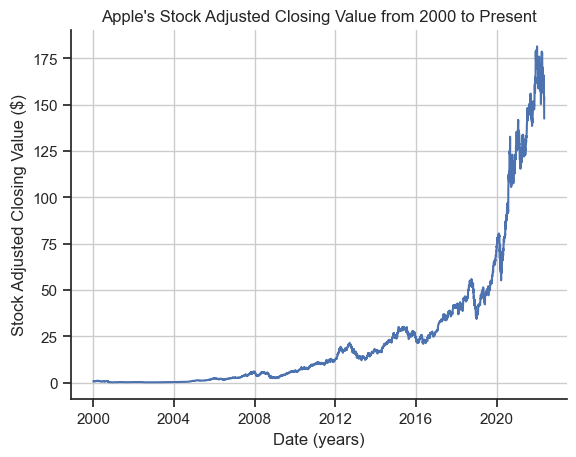

In [15]:
sns.lineplot(x='Date', y='Adj_Close', data=df)
plt.title("Apple's Stock Adjusted Closing Value from 2000 to Present")
plt.ylabel("Stock Adjusted Closing Value ($)")
plt.xlabel("Date (years)")
plt.grid(True)
plt.show()

This plot shows an overview of how Apple's stock value has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value began to increase rapidly after the release of the first iPhone. Further analysis is needed to look at specific time frames to conclude which iPhones were sucesses for Apple.

Now to take a closer look at the pervious plot:

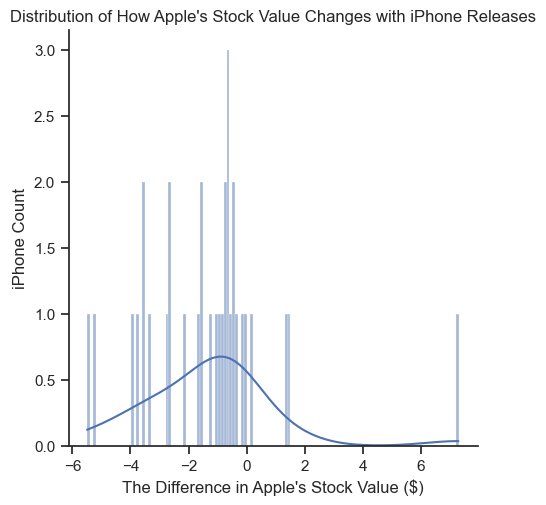

In [16]:
sns.displot(data=df[df['iPhone'].notnull()], x='Two_Week_Difference', binwidth=0.1, kde=True)
plt.title("Distribution of How Apple's Stock Value Changes with iPhone Releases")
plt.ylabel("iPhone Count")
plt.xlabel("The Difference in Apple's Stock Value ($)")
plt.show()

This plot shows the distribution of how Apple's stock value changes with iPhone releases. The x-axis represents the difference in Apple's stock value between two weeks, while the y-axis shows the count of iPhones released during that period. The plot suggests that iPhone releases may have an negative impact on Apple's stock value because the probability densty function peaks at approximately negative one.

For a more general look at the data, the next plot looks at the last plot relative to Apple's yearly opening price:

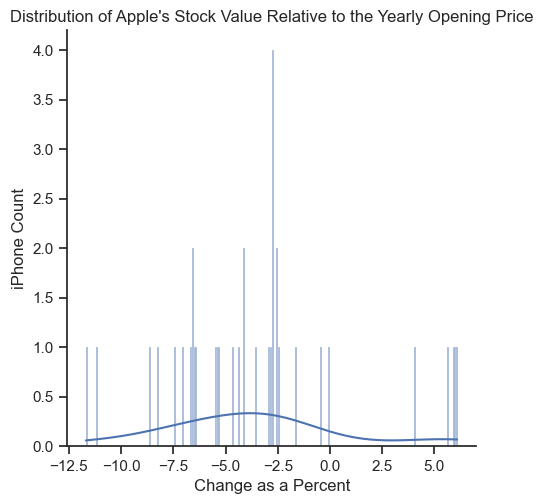

In [17]:
sns.displot(data=df[df['iPhone'].notnull()], x='Percent_Change', binwidth=0.1, kde=True)
plt.title("Distribution of Apple's Stock Value Relative to the Yearly Opening Price")
plt.ylabel("iPhone Count")
plt.xlabel("Change as a Percent")
plt.show()

This plot shows the distribution of Apple's stock value changes relative to the yearly opening price, with the x-axis representing the percentage change and the y-axis representing the count of iPhone releases. The plot suggests that the majority of iPhone releases have negative stock value changes because majority of iPhone lay below zero, with a few outliers of positive changes. The probability densty function peaks around negative four percent, implying that most iPhone releases have approximately a negative four percent impact on Apple's stock value.

Next, we can look at where each specific iphone is placed on the previous plot to determine weather an iPhone has a postive or negative impact on Apple's stock value:

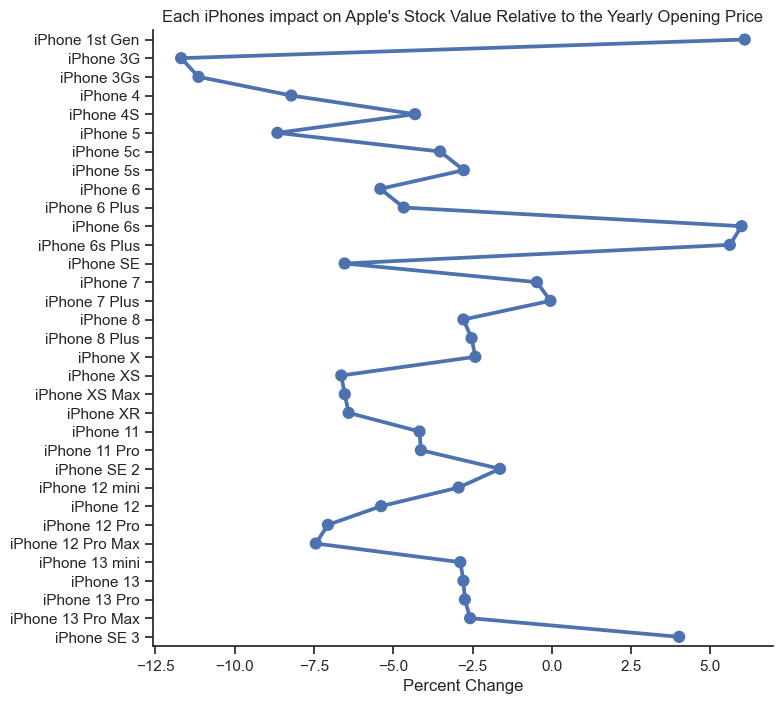

In [18]:
plt.figure(figsize=(8,8))
sns.pointplot(data=df[df['iPhone'].notnull()], x='Percent_Change', y='iPhone')
plt.xlabel("Percent Change")
plt.ylabel("")
plt.title("Each iPhones impact on Apple's Stock Value Relative to the Yearly Opening Price")
plt.show()

This plot shows the distribution of individual iPhone releases' impact on Apple's stock value. The x-axis represents the percentage change in Apple's stock value relative to the yearly opening price, while the y-axis represents the specific iPhone releases. The plot suggests that the majority of iPhone releases have a negative impact on Apple's stock value, with a few outliers of positive impact. Specicifally the few positive impacts being the iPhone 1st Gen, iPhone 6s, iPhone 6s Plus, and iPhone SE 3. Three out of these four iPhones, the iPhone 1st Gen, iPhone 6s, and iPhone 6s Plus stand out as innovative iPhones.

---
## Conclusion:
Based on the analysis, it can be concluded that the majority of iPhone releases have a negative impact on Apple's stock value, with the probability density function peaking around a negative four percent change relative to the yearly opening price. The iPhone with the largest negative impact on Apple's stock value is the iPhone 3G, where the stock value dropped eleven percent relative to the yearly opening price. The plot also shows that there are a few iPhones that have a positive impact on Apple's stock value. The iPhone with the largest positive impact of six percent is the iPhone 1st generation.

With this imformation we can answer the question, "which iPhone had the largest positive impact and which iPhone had the largest negative impact on Apple's stock value?" The iPhone 3G was the worst iPhone and the iPhone 1st Gen was the best iPhone for the increase of Apple's stock value.

The question "to what extend do iPhones impact Apple's stock value" can also be answered from this imformation. Apple's iPhones have impacted the stock values by percentages ranging between six and negative eleven, where majority lay around negative four.

To answer the main question, "how much do iPhones impact Apple's stock value", we can first at the plot titled "Distribution of Apple's Stock Value Relative to the Yearly Opening Price". Here we can see that the probability densty function peaks around negative four percent. From this we can determine that Apple's stock value in negatively impacted by most iPhones; however, in the plot titled "Apple's Stock Adjusted Closing Value from 2000 to Present" we can see that the trend in Apple's stock value has been increases since 2005. Therefore, we can conclude that iPhones do not have a large impact on Apple's stock value because the negative impact most iPhones have on Apple's stock value do not impact the long-term positive trend of Apple's stock value.

---